In [2]:
import obspy
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import pandas as pd
import yaml
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

In [3]:
with open('/home/smocz/expand_redpy/scripts/config.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
    
homedir = config['homedir']
readdir = config['readdir']
#today's date, aka the rightmost x value
today = '2022-08-09T23:59:59'

In [4]:
#parameters
volc_md = pd.read_csv(readdir+'Volcano_Metadata.csv') #read metadata
volc_md['netsta'] = volc_md['Network'].astype(str)+'.'+volc_md['Station'].astype(str) #get net.sta

netsta = volc_md['netsta'].values.tolist() #make netsta a list
start = volc_md['Starttime'].values.tolist() #make starttimes a list
end = volc_md['Endtime'].values.tolist() #make endtimes a list
for ii,i in enumerate(end): #change the foreseeable future endtimes (2599-12-31T23:59:59) to today's date
    if i == '2599-12-31T23:59:59':
        end[ii]=today
label_names = ['Longer than or Equal to 20 Years','Between 20 and 3 Years','Shorter than or Equal to 3 Years, but Longer than 1',
              'Eqcorrscan Detections Start', 'REDPy Catalog Starts',
              'Last Day of Eqcorrscan Detections'] #list of names for labels (0 will be longest, 1 is middle, 2 is shortest)
colors = ['green','blue','orange','black','red','purple']

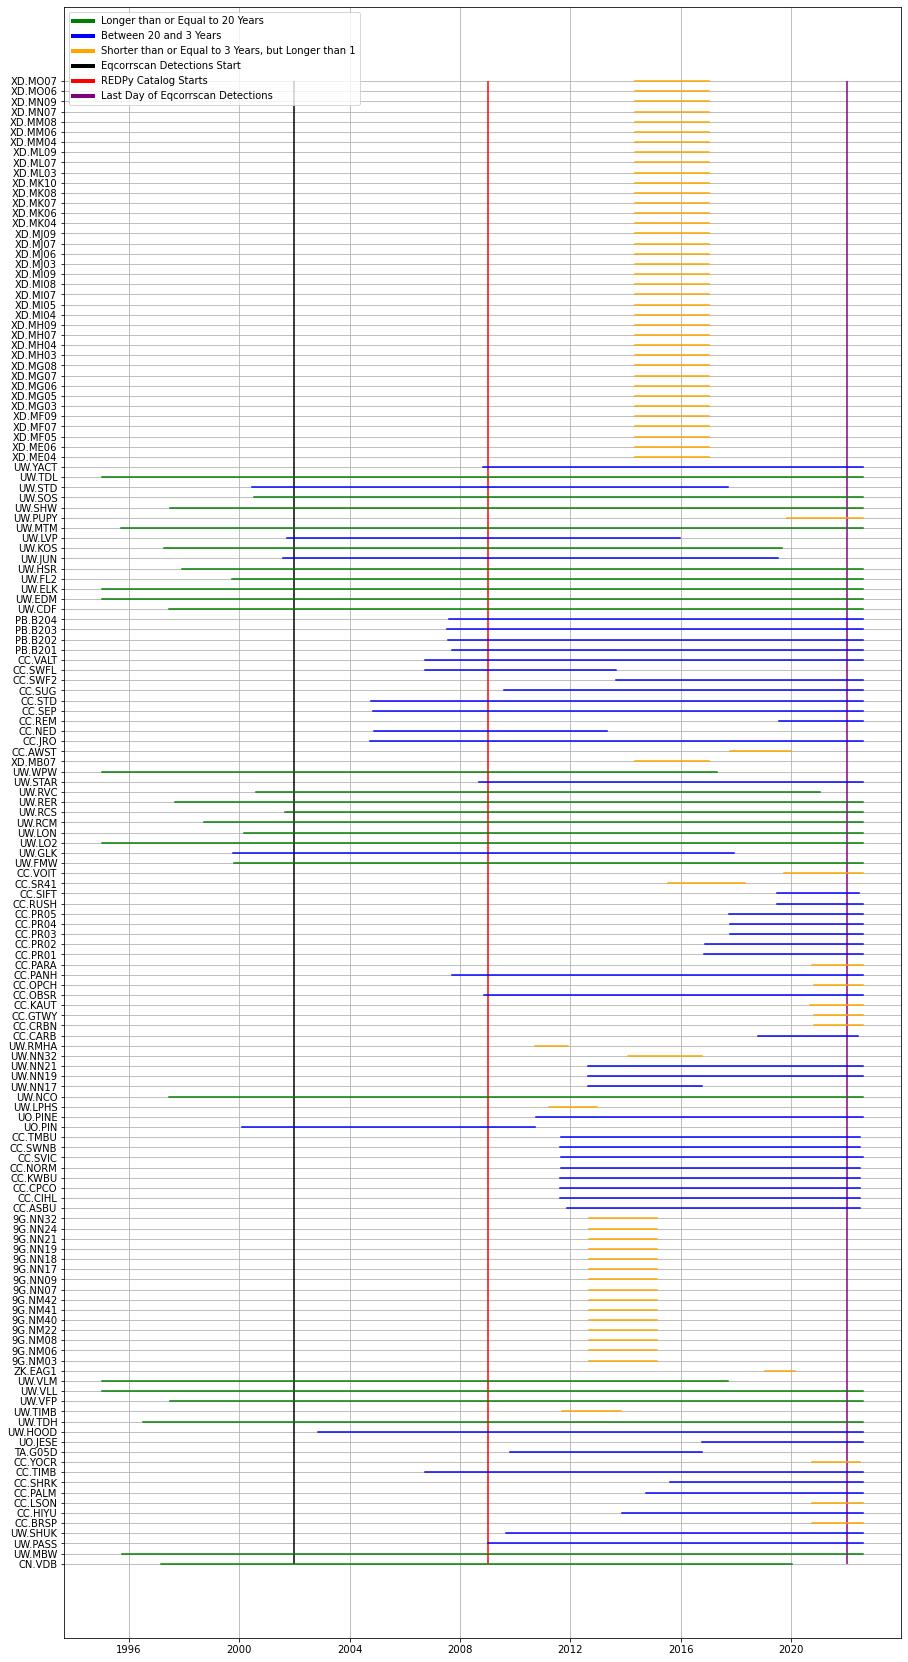

In [5]:
plt.figure(figsize=(15,30))
for i in range(0,len(netsta)):
    x = pd.to_datetime([start[i],end[i]])
    y = [netsta[i],netsta[i]]
    dif = UTCDateTime(end[i])-UTCDateTime(start[i])
    if dif >= (3600*24*365*20):
        plt.plot(x,y,label=label_names[0],color=colors[0]) #label=netsta[i]
    if dif < (3600*24*365*20) and dif > (3600*24*365*3):
        plt.plot(x,y,label=label_names[1],color=colors[1])
    if dif <= (3600*24*365*3):
        plt.plot(x,y,label=label_names[2],color=colors[2])

    
# plt.xlim(pd.to_datetime('2002-01-01'),pd.to_datetime(today))
# plt.ylim(netsta[0],netsta[-1])
plt.vlines(pd.to_datetime('2002-01-01'),ymin=netsta[0],ymax=netsta[-1],color=colors[3],label = label_names[3])
plt.vlines(pd.to_datetime('2009-01-01'),ymin=netsta[0],ymax=netsta[-1],color=colors[4],label = label_names[4])
plt.vlines(pd.to_datetime('2022-01-01'),ymin=netsta[0],ymax=netsta[-1],color=colors[5],label = label_names[5])
# plt.legend()
from matplotlib.lines import Line2D #make unplotted lines to set colors
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4),
                Line2D([0], [0], color=colors[3], lw=4),
                Line2D([0], [0], color=colors[4], lw=4),
                Line2D([0], [0], color=colors[5], lw=4)]
plt.legend(custom_lines, label_names,loc=2)
plt.grid(True)
# plt.show()
plt.savefig(homedir+'overlap.png')

#ADD XLIM (2002-01-01 to 2021-12-31)

In [ ]:
netsta = ['CC.TEST','UW.TEST','CN.TEST']
start = ['2022-01-02','2022-04-05','2022-07-18']
end = ['2022-10-20','2022-04-20','2022-12-31']
for i in range(0,len(netsta)):
    x = pd.to_datetime([start[i],end[i]])
    y = [netsta[i],netsta[i]]
    plt.plot(x,y,label='a'+str(i))
plt.legend()
plt.show()

In [ ]:
# create data
# x = [10,20,30,40,50]
y = [30,30,30]

x = pd.to_datetime(['2022-01-02','2022-04-05','2022-07-18'])

y2 = [20,30,40]

In [ ]:
# plot lines
plt.plot(x, y, label = "line 1")
plt.plot(x, y2, label = "line 2")
plt.legend()
plt.show()